### Cayley Dickson Construction

------------------

In mathematics, the Cayley–Dickson construction, named after Arthur Cayley and Leonard Eugene Dickson, produces a sequence of algebras over the field of real numbers, each with twice the dimension of the previous one. The algebras produced by this process are known as Cayley–Dickson algebras, for example complex numbers, quaternions, and octonions. These examples are useful composition algebras frequently applied in mathematical physics.

The Cayley–Dickson construction defines a new algebra as a Cartesian product of an algebra with itself, with multiplication defined in a specific way (different from the componentwise multiplication) and an involution known as conjugation. The product of an element and its conjugate (or sometimes the square root of this product) is called the norm.

The symmetries of the real field disappear as the Cayley–Dickson construction is repeatedly applied: first losing order, then commutativity of multiplication, associativity of multiplication, and next alternativity. 

[Wikipedia Article](https://en.wikipedia.org/wiki/Cayley%E2%80%93Dickson_construction)

In [23]:
from complex import *

A = O(H(1,2,3,4), H(1,2,3,4), pair=True)
B = O(5,6,7,8,-5,-6,-7,-8)

print(A)
print(B)

(1 2 3 4 1 2 3 4)
(5 6 7 8 -5 -6 -7 -8)


#### Hyper Complex Products

In [24]:
W = A.innerproduct(B)
X = A.outerproduct(B, string=True, translate=True)

print("Inner Product:\n", W, "\n")
print("Outer Product:\n", X)

Inner Product:
 0.0 

Outer Product:
   5.0  -6.0i  -7.0j  -8.0k   5.0m   6.0I   7.0J   8.0K
10.0i   12.0 -14.0k  16.0j  10.0I -12.0m -14.0K  16.0J
15.0j  18.0k   21.0 -24.0i  15.0J  18.0K -21.0m -24.0I
20.0k -24.0j  28.0i   32.0  20.0K -24.0J  28.0I -32.0m
 5.0m   6.0I   7.0J   8.0K   -5.0   6.0i   7.0j   8.0k
10.0I -12.0m  14.0K -16.0J -10.0i  -12.0 -14.0k  16.0j
15.0J -18.0K -21.0m  24.0I -15.0j  18.0k  -21.0 -24.0i
20.0K  24.0J -28.0I -32.0m -20.0k -24.0j  28.0i  -32.0


#### Multiplication Matricies

In [18]:
Y = A.matrix(string=True, translate=True)
Z = A.matrix(identity=True, string=True)

print("Multiplication Matrix:\n", Y, "\n")
print("Multiplication Identity:\n", Z)

Multiplication Matrix:
 1  i  j  k  m  I  J  K
i -1  k -j  I -m -K  J
j -k -1  i  J  K -m -I
k  j -i -1  K -J  I -m
m -I -J -K -1  i  j  k
I  m -K  J -i -1 -k  j
J  K  m -I -j  k -1 -i
K -J  I  m -k -j  i -1 

Multiplication Identity:
 1  2  3  4  5  6  7  8
2 -1  4 -3  6 -5 -8  7
3 -4 -1  2  7  8 -5 -6
4  3 -2 -1  8 -7  6 -5
5 -6 -7 -8 -1  2  3  4
6  5 -8  7 -2 -1 -4  3
7  8  5 -6 -3  4 -1 -2
8 -7  6  5 -4 -3  2 -1


#### Octonion Rotation Visualisation

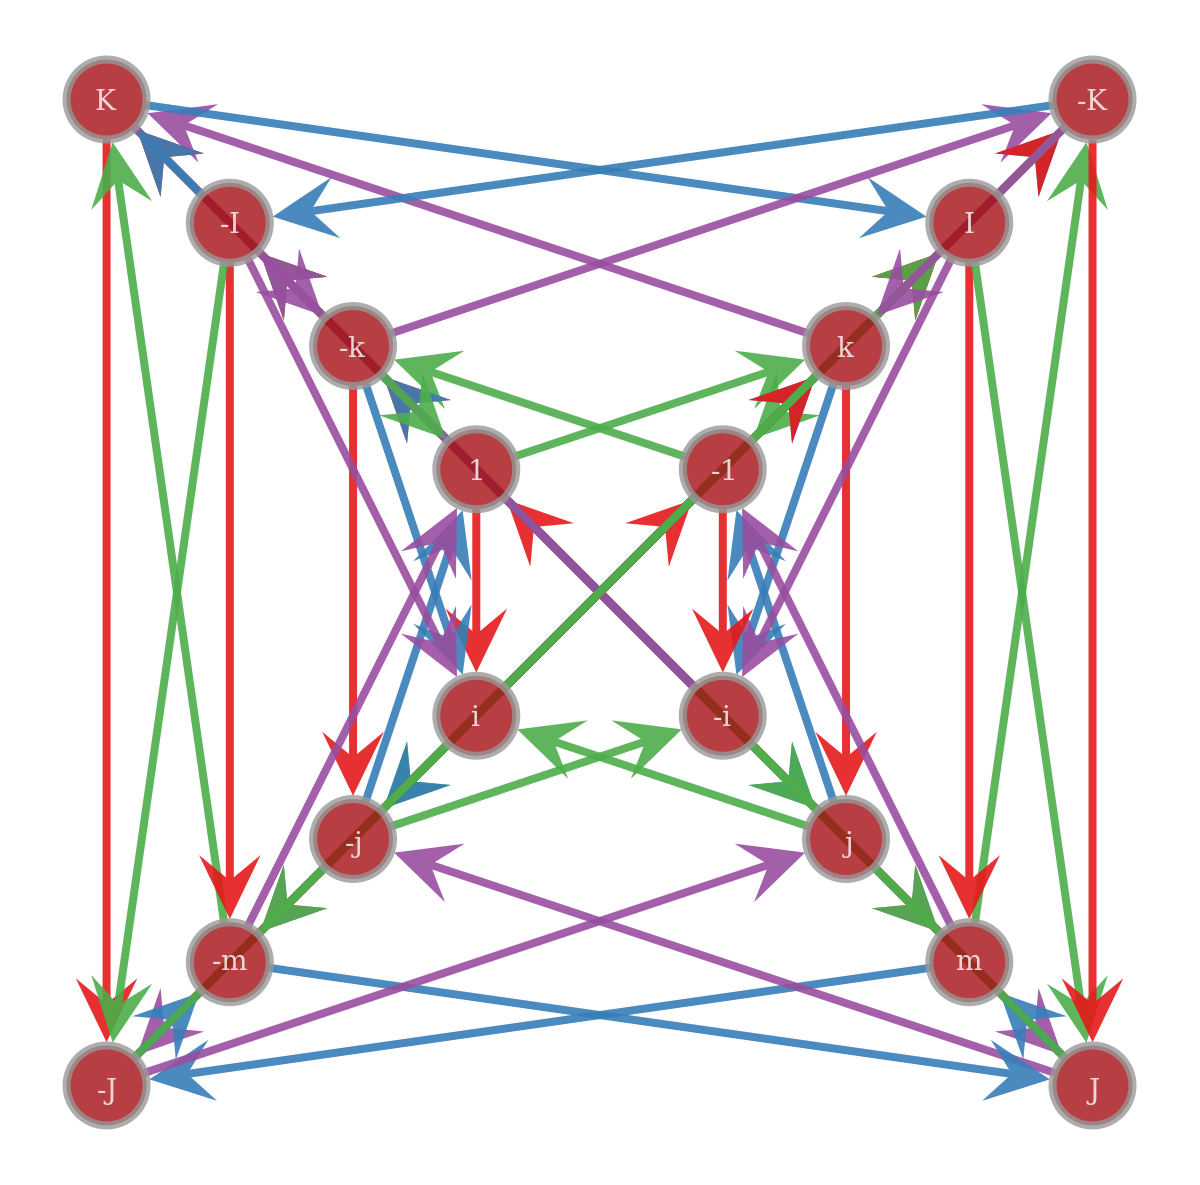

In [19]:
A.group(translate=True)

#### Octonion Complexity Visualization

We can visualize the multiplication tables with a diverging colormap. Red values are positive, blue values are negative. For example, with the complex numbers `1 => least red`, `i => most red`, `-1 => least blue`, `-i => most blue`. Additionally, for the smaller algebras, we can construct the [Cayley Graph](http://en.wikipedia.org/wiki/Cayley_graph).

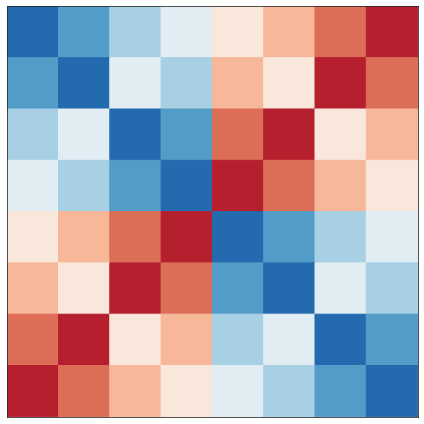

In [20]:
A.plot(diverging=False)